<a href="https://colab.research.google.com/github/sarique2003/Zeo_Tap/blob/main/Mohd_Sarique_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import requests
from google.colab import drive

# the json files are uploaded in drive and being used after mounting
drive.mount('/content/drive')
drive_path = '/content/drive/MyDrive/Zeotap'

Mounted at /content/drive



Missing Values:
Customers: CustomerID      0.0
CustomerName    0.0
Region          0.0
SignupDate      0.0
dtype: float64
Products: ProductID      0.0
ProductName    0.0
Category       0.0
Price          0.0
dtype: float64
Transactions: TransactionID      0.0
CustomerID         0.0
ProductID          0.0
TransactionDate    0.0
Quantity           0.0
TotalValue         0.0
Price              0.0
dtype: float64


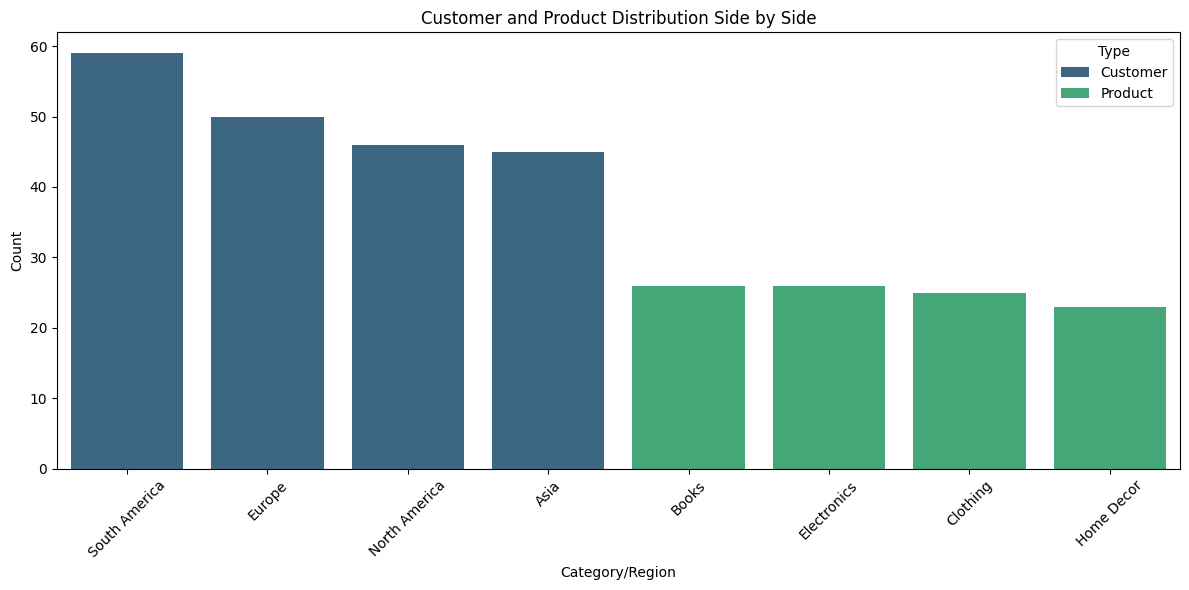

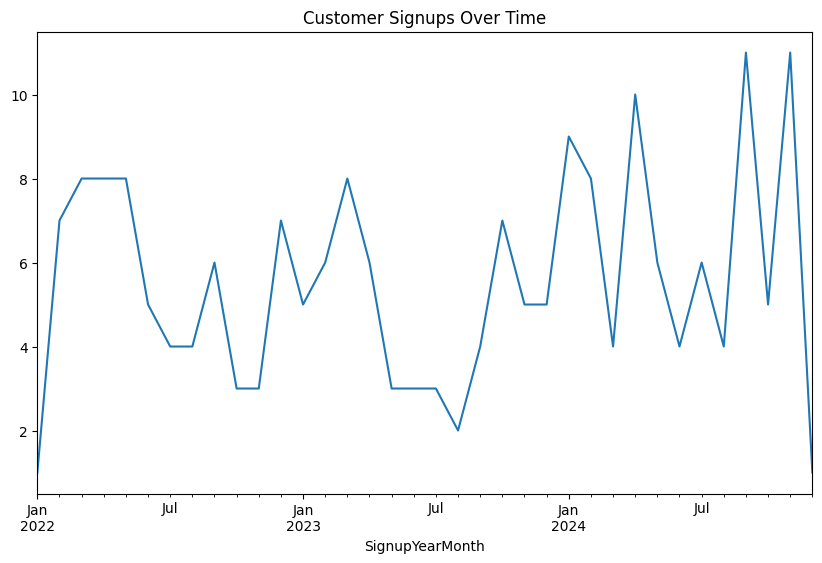



Top 5 Most Sold Products by Month:
   TransactionYearMonth ProductID  Quantity            ProductName
0               2023-12      P020         4      ActiveWear Jacket
1               2023-12      P057         4  ActiveWear Smartphone
2               2023-12      P061         2    HomeSense Desk Lamp
3               2023-12      P083         2  ActiveWear Smartwatch
4               2024-01      P063        11          TechPro Novel
..                  ...       ...       ...                    ...
59              2024-12      P035        12     ActiveWear T-Shirt
60              2024-12      P053        10            TechPro Rug
61              2024-12      P036         9       BookWorld Jacket
62              2024-12      P079         8         ActiveWear Rug
63              2024-12      P017         6    ActiveWear Textbook

[64 rows x 4 columns]


<ipython-input-14-e0f33b5a5f4c>:50: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(5, 'Quantity'))  # Get top 5 products by quantity for each month


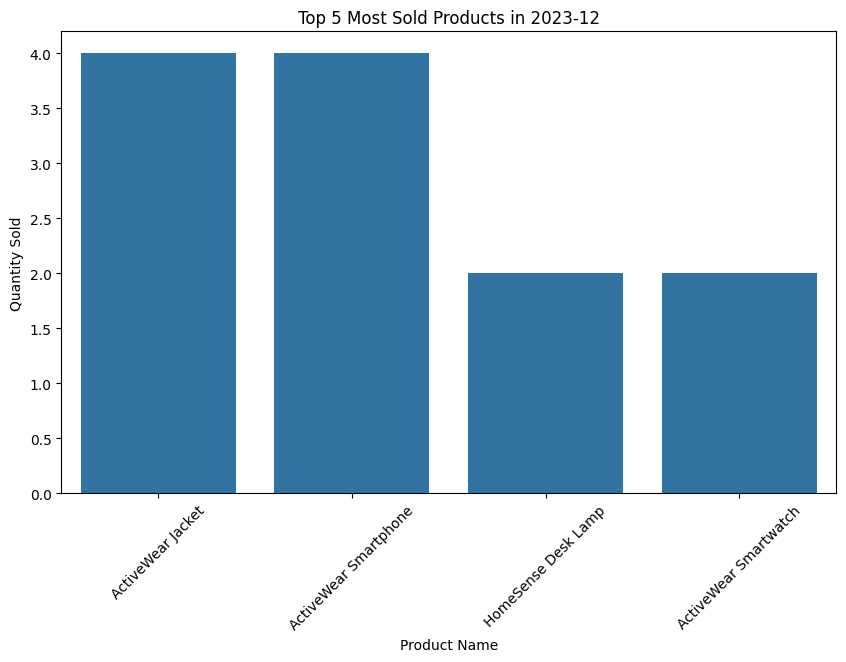

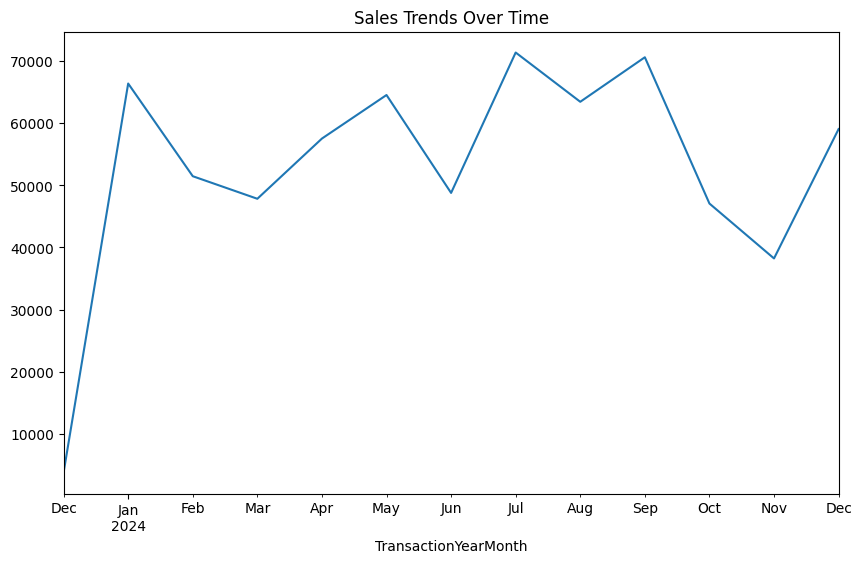




Top 10 Customers by Total Spend:
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64

Top 5 Products by Quantity Sold:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
Name: Quantity, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv(f"{drive_path}/Customers.csv")
products = pd.read_csv(f"{drive_path}/Products.csv")
transactions = pd.read_csv(f"{drive_path}/Transactions.csv")

# Check for missing values
print("\nMissing Values:")
print("Customers:", customers.isnull().mean())
print("Products:", products.isnull().mean())
print("Transactions:", transactions.isnull().mean())

#Metric 1
customer_counts = customers['Region'].value_counts().reset_index()
customer_counts.columns = ['Category', 'Count']
customer_counts['Type'] = 'Customer'
product_counts = products['Category'].value_counts().reset_index()
product_counts.columns = ['Category', 'Count']
product_counts['Type'] = 'Product'
combined_data = pd.concat([customer_counts, product_counts])
plt.figure(figsize=(12, 6))
sns.barplot(data=combined_data, x='Category', y='Count', hue='Type', palette='viridis')
plt.title("Customer and Product combined")
plt.xlabel("Category/Region")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("\n")

#Metric 2
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['SignupYearMonth'] = customers['SignupDate'].dt.to_period('M')
signup_trends = customers.groupby('SignupYearMonth').size()
signup_trends.plot(kind='line', figsize=(10, 6), title="Customer Signups Over Time")
plt.show()
print("\n")

#Metric3
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['TransactionYearMonth'] = transactions['TransactionDate'].dt.to_period('M')
topproducts_bymonth = (
    transactions.groupby(['TransactionYearMonth', 'ProductID'])['Quantity']
    .sum()
    .reset_index()
    .merge(products[['ProductID', 'ProductName']], on='ProductID')
    .groupby('TransactionYearMonth')
    .apply(lambda x: x.nlargest(5, 'Quantity'))
    .reset_index(drop=True)
)
print("Top 5 Most Sold Products by Month:")
print(topproducts_bymonth)
example_month = topproducts_bymonth['TransactionYearMonth'].iloc[0]
example_data = topproducts_bymonth[top_products_by_month['TransactionYearMonth'] == example_month]
plt.figure(figsize=(10, 6))
sns.barplot(data=example_data, x='ProductName', y='Quantity')
plt.title(f"Top 5 Most Sold Products in {example_month}")
plt.xlabel("Product Name")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)
plt.show()
print("\n")

#Metric 4
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['TransactionYearMonth'] = transactions['TransactionDate'].dt.to_period('M')
sales_trends = transactions.groupby('TransactionYearMonth')['TotalValue'].sum()
sales_trends.plot(kind='line', figsize=(10, 6), title="Sales Trends Over Time")
plt.show()
print("\n")

#Metric 5
merged_data = pd.merge(transactions, customers, on='CustomerID')
merged_data = pd.merge(merged_data, products, on='ProductID')
top_customers = merged_data.groupby('CustomerID')['TotalValue'].sum().nlargest(10)
print("\nTop 10 Customers by Total Spend:")
print(top_customers)
top_products = merged_data.groupby('ProductName')['Quantity'].sum().nlargest(5)
print("\nTop 5 Products by Quantity Sold:")
print(top_products)